In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
import pingouin as pg
sns.set_style("whitegrid")

In [3]:
np.random.seed(1530)

size = 1000

x1 = np.random.normal(loc=40, scale = 2, size= int(size/2))
x2 = np.random.normal(loc= 69, scale= 2, size=int(size/2))

bi_modal = np.concatenate([x1, x2])

x1 = np.random.normal(loc=40, scale=4, size=int(size/4))
x2 = np.random.normal(loc= 69, scale=4, size=int(size/4))
x3 = np.random.normal(loc=0, scale=2, size=int(size/4))
x4 = np.random.normal(loc=80, scale=2, size=int(size/4))

multi_modal= np.concatenate([x1, x2, x3, x4])

df = pd.DataFrame(data={
    "Normal": np.random.normal(loc=0, scale=2, size= size),
    "Positive skewed": skewnorm.rvs(a=10, size=size),
    "Negative skewed": skewnorm.rvs(a=-10, size=size),
    "Exponential": np.random.exponential(scale=20, size=size),
    "Uniform": np.random.uniform(low=0.0, high=1.0, size=size),
    "Bimodal": bi_modal,
    "Multimodal": multi_modal,
    "Poisson": np.random.poisson(lam=1.0, size=size),
    "Discrete": np.random.choice([10, 12, 14, 16, 17, 20, 69], size=size)
}).round(3)

df.head()

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-3.308,1.390,-1.441,22.500,0.395,42.250,38.503,0,20
1,0.695,0.199,-0.915,17.577,0.165,34.392,47.095,1,14
2,-0.592,0.353,-0.420,16.179,0.910,38.285,40.785,1,17
3,2.363,0.334,-1.644,17.131,0.500,38.806,32.635,0,14
4,2.562,0.914,-0.392,2.974,0.849,40.623,39.815,0,16


In [4]:
df.describe()

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.063786,0.773847,-0.778844,21.454978,0.499233,54.458767,47.109234,1.009000,23.585000
std,1.930000,0.604063,0.598479,23.000792,0.290199,14.654587,31.095330,1.007936,20.212653
min,-8.186000,-0.236000,-3.005000,0.013000,0.002000,32.604000,-4.568000,0.000000,10.000000
25%,-1.320000,0.297000,-1.166000,5.881250,0.251750,39.957750,22.331500,0.000000,12.000000
50%,-0.029500,0.632000,-0.676000,14.507500,0.503500,53.849000,53.876500,1.000000,16.000000
75%,1.208750,1.139500,-0.295500,28.265250,0.751250,68.977250,75.486250,2.000000,20.000000
max,5.829000,3.347000,0.165000,220.102000,1.000000,74.285000,84.434000,6.000000,69.000000


In [9]:
df.quantile(q=[0, 0.25, 0.50, 0.75, 1])

,Normal,Positive skewed,Negative skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0.00,-8.18600,-0.2360,-3.0050,0.01300,0.00200,32.60400,-4.56800,0.0,10.0
0.25,-1.32000,0.2970,-1.1660,5.88125,0.25175,39.95775,22.33150,0.0,12.0
0.50,-0.02950,0.6320,-0.6760,14.50750,0.50350,53.84900,53.87650,1.0,16.0
0.75,1.20875,1.1395,-0.2955,28.26525,0.75125,68.97725,75.48625,2.0,20.0
1.00,5.82900,3.3470,0.1650,220.10200,1.00000,74.28500,84.43400,6.0,69.0


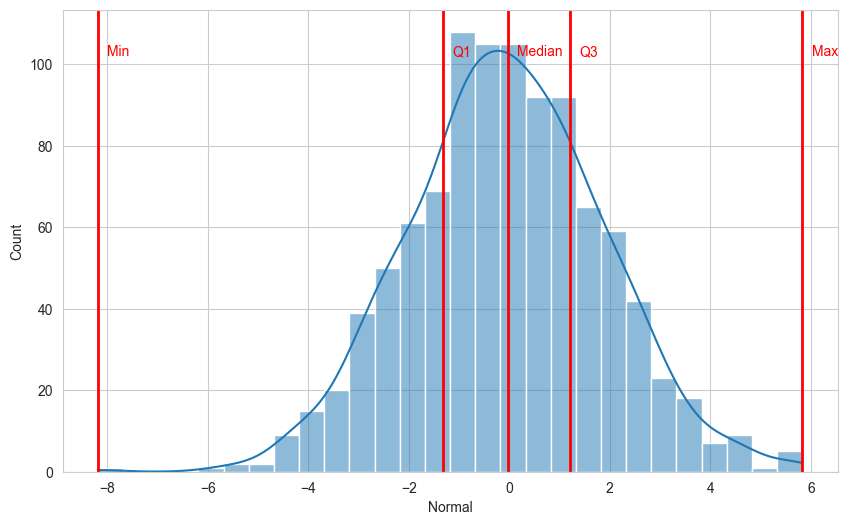

In [11]:
new_col= "Normal"

new_series = pd.Series(data=["Min", "Q1", "Median", "Q3", "Max"],
                       index=[0, 0.25, 0.50, 0.75, 1.0])

fig, axes = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x=new_col, kde=True)

for quantile in [0, 0.25, 0.50, 0.75, 1.0]:
    plt.axvline(df[new_col].quantile(q=quantile), linestyle="-", linewidth=2, 
                c="r")
    plt.text(df[new_col].quantile(q=quantile) + df[new_col].std()/10, 
             y=axes.get_ylim()[1] * 0.90, fontsize=10, c="r",
            s= f"{new_series [quantile]}")
    
plt.show()

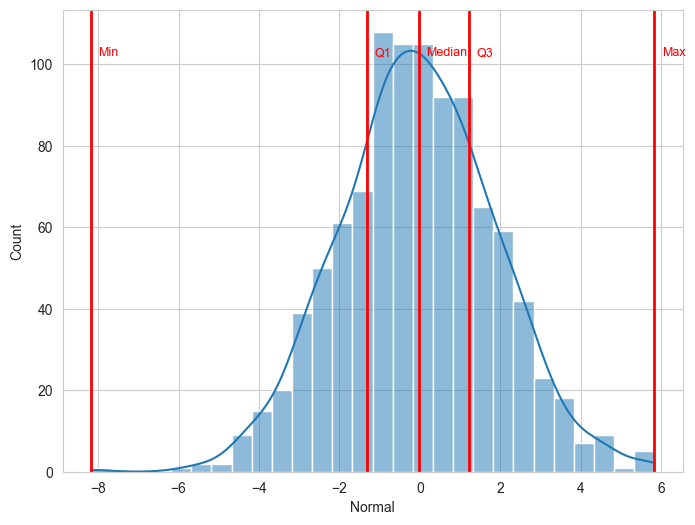

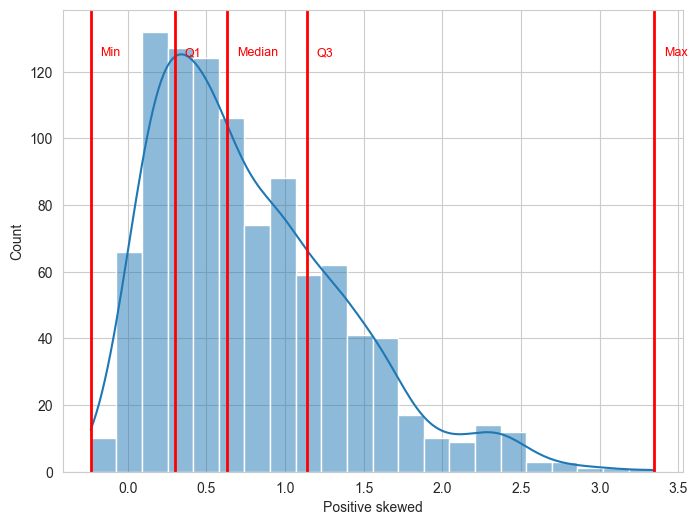

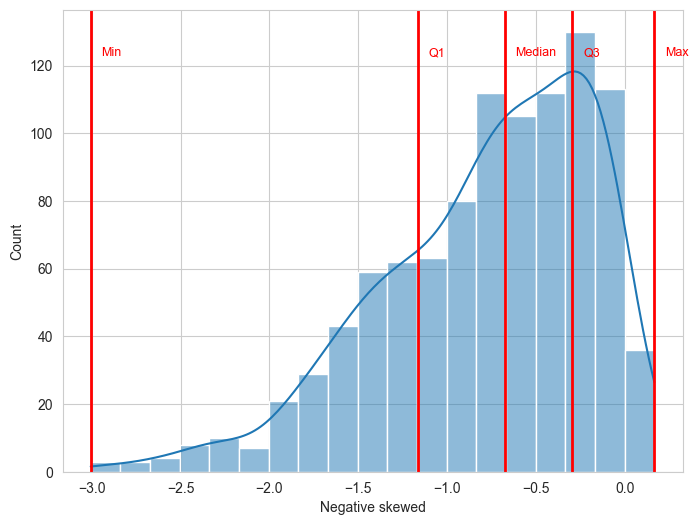

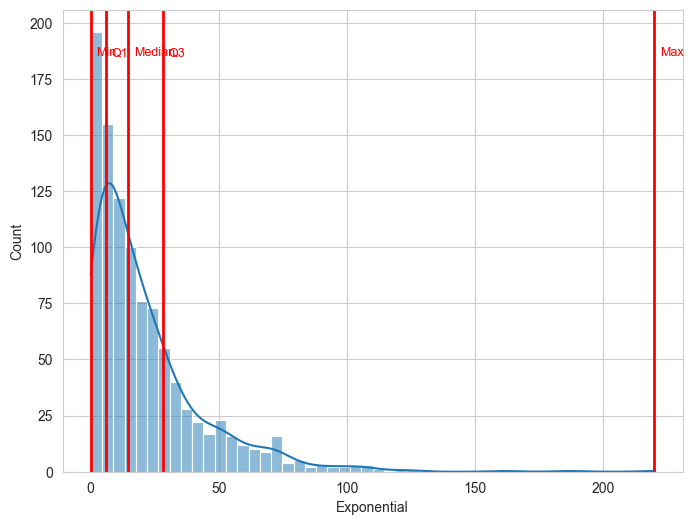

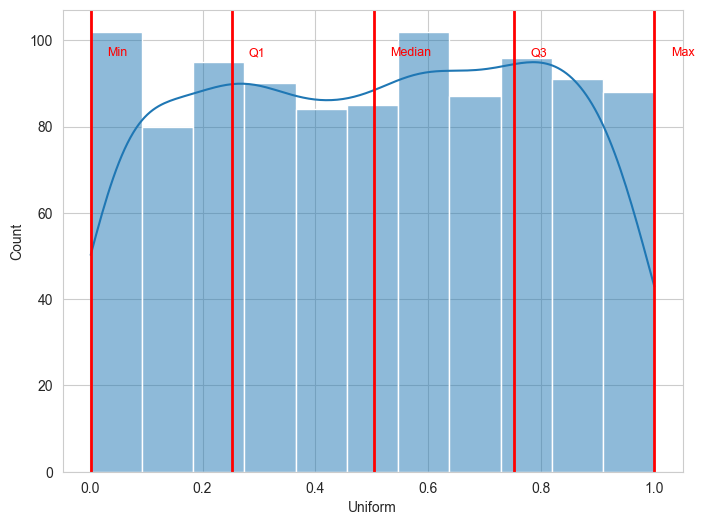

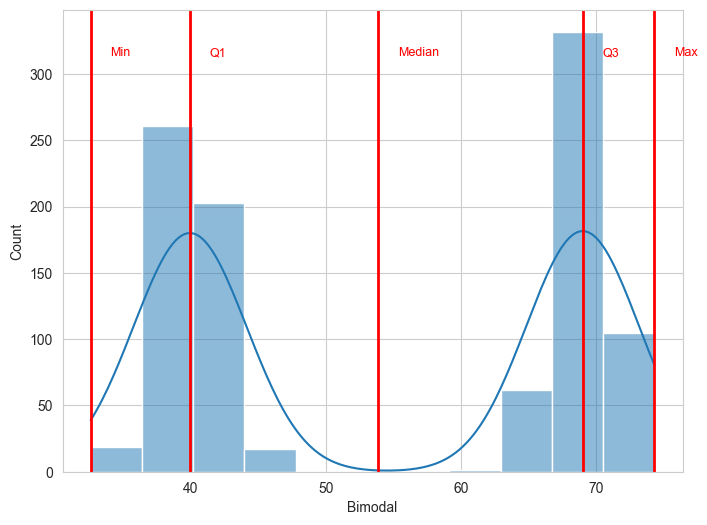

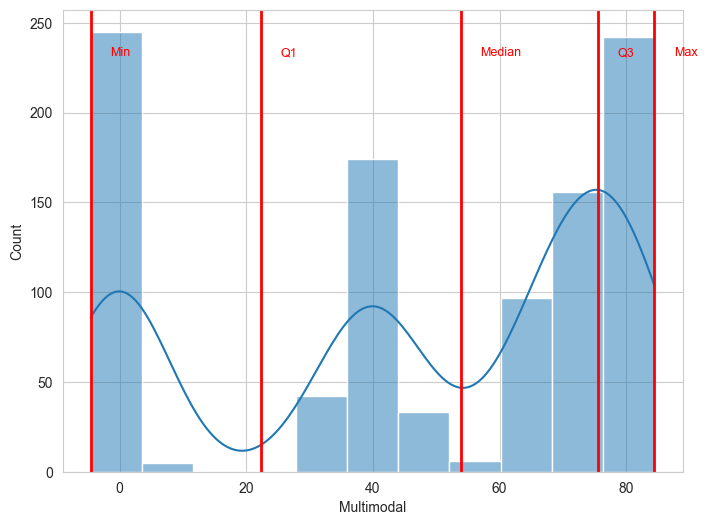

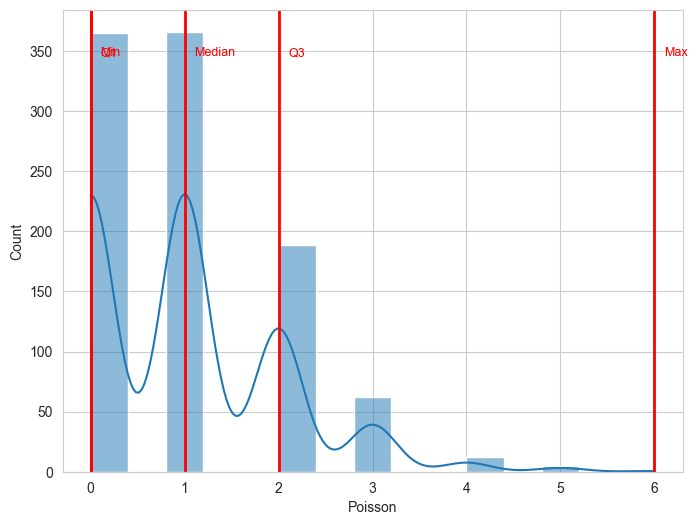

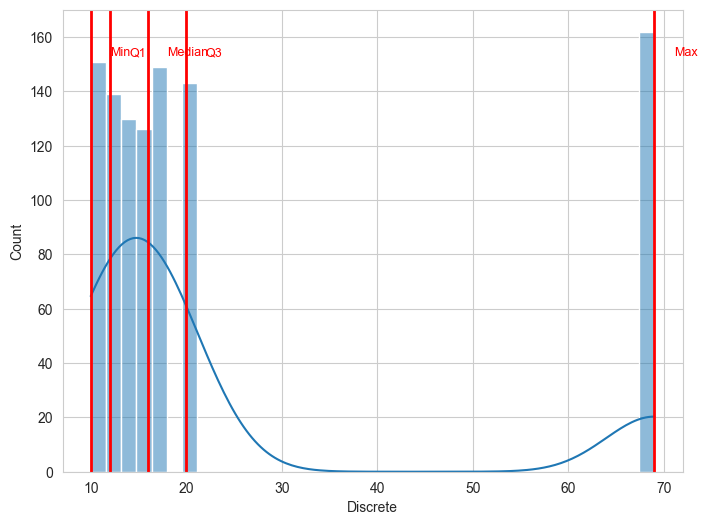

In [13]:
new_series= pd.Series(data=["Min", "Q1", "Median", "Q3", "Max"], index=[0, 0.25, 0.50, 0.75, 1.0])

for col in df.columns:
    fig, axes= plt.subplots(figsize=(8,6))
    sns.histplot(data=df, x=col, kde=True)
    
    for quantile in [0, 0.25, 0.50, 0.75, 1.0]:
        plt.axvline(df[col].quantile(q=quantile), linestyle="-", linewidth=2,
                    c="r" )
        plt.text(df[col].quantile(q=quantile) + df[col].std()/10, c="r", 
                 y=axes.get_ylim()[1] * 0.90, fontsize=9, s=f"{new_series [quantile]}")
    
    plt.show()
    print("\n\n")


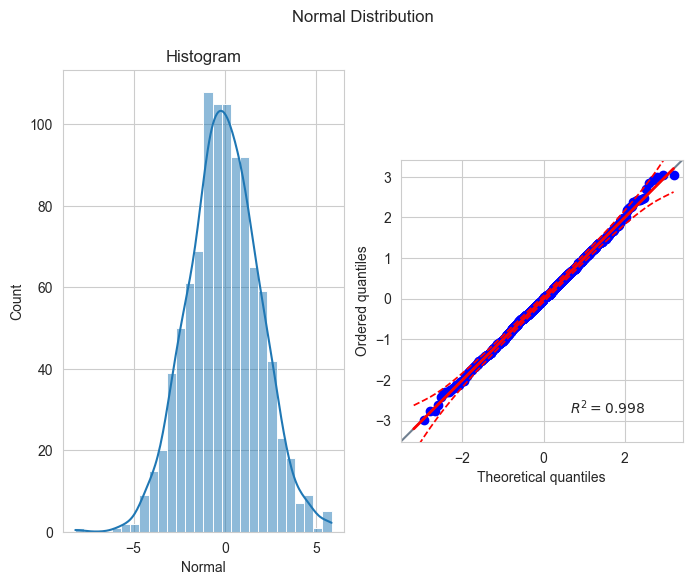

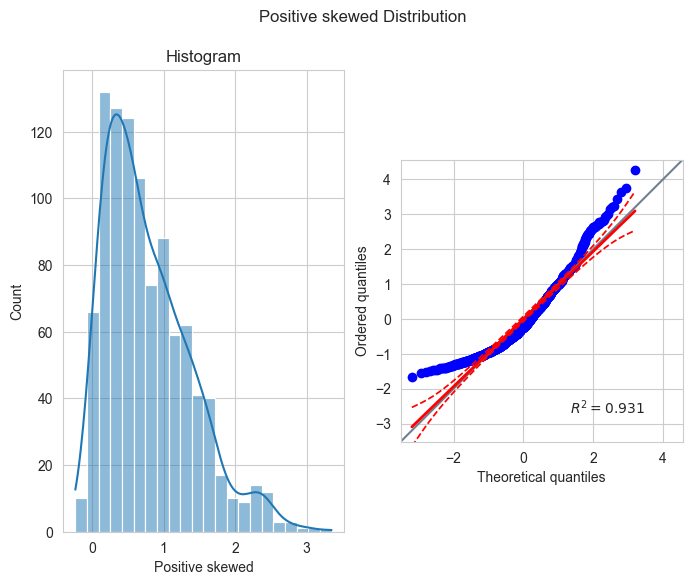

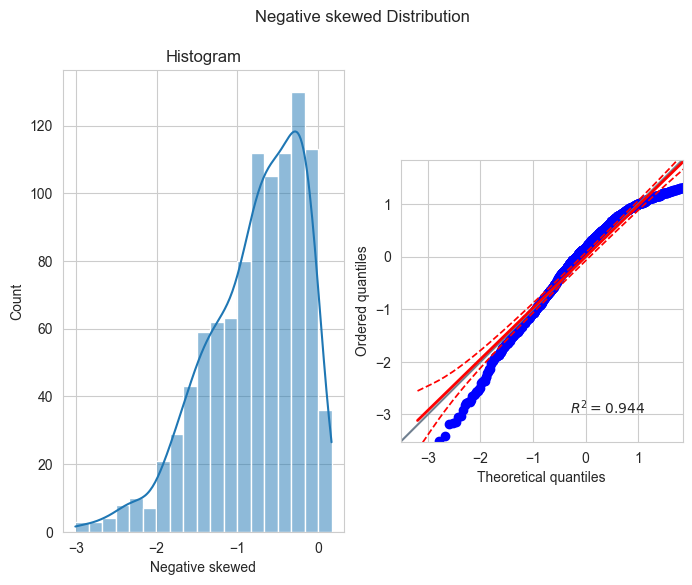

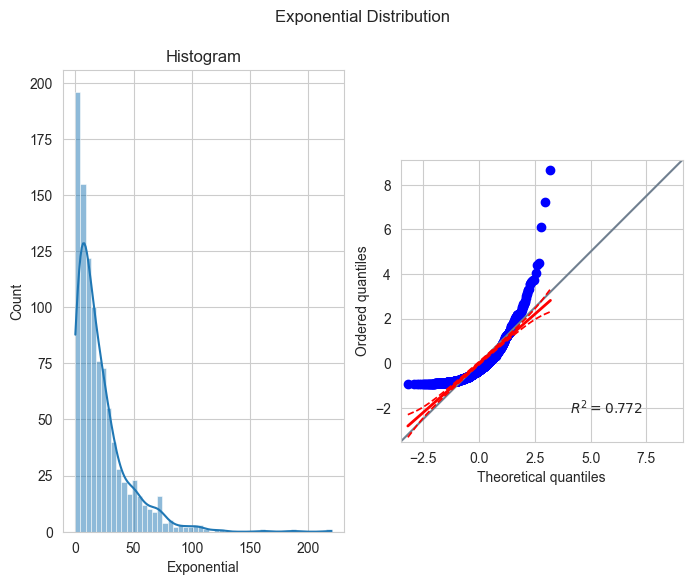

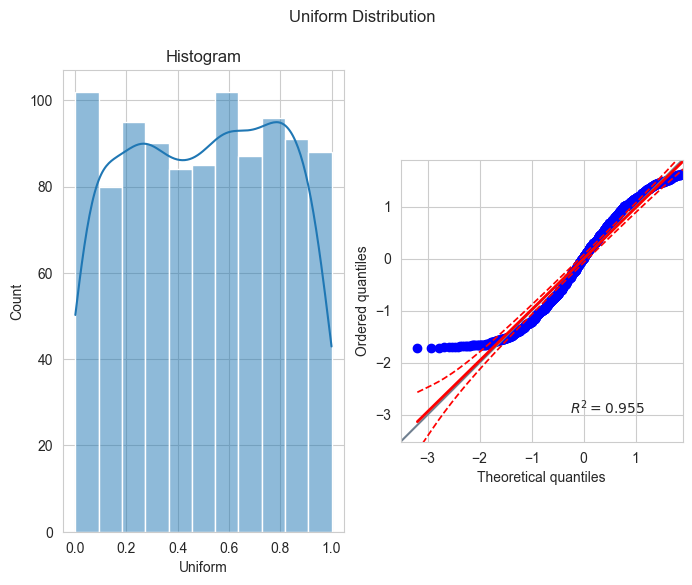

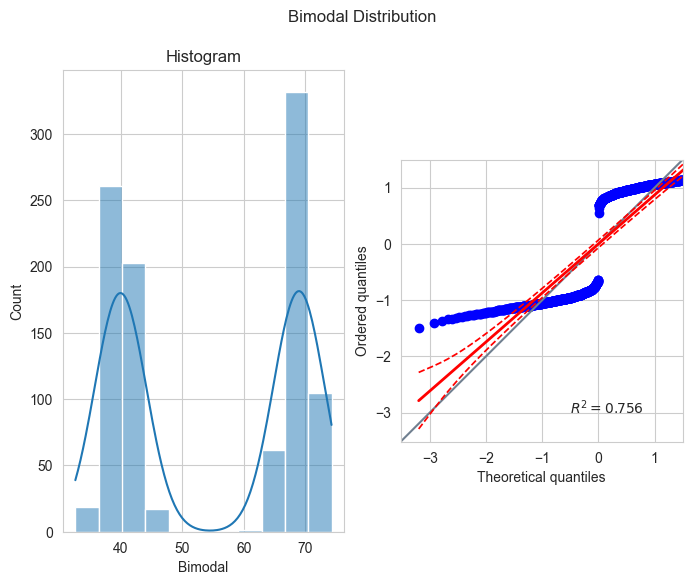

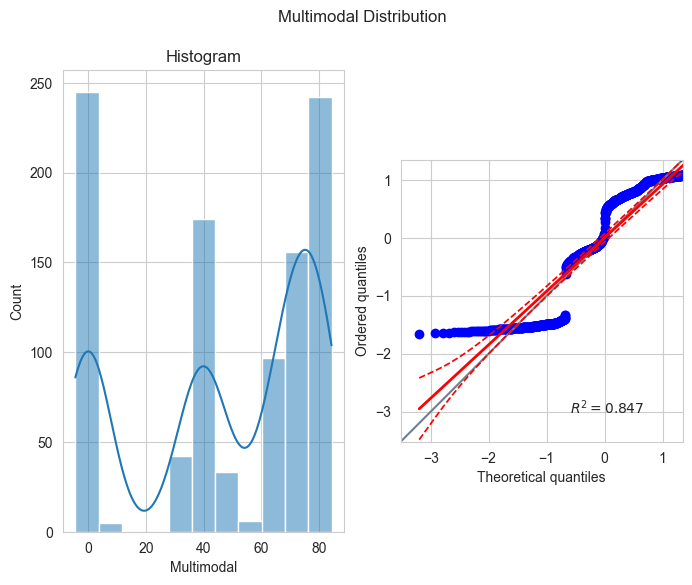

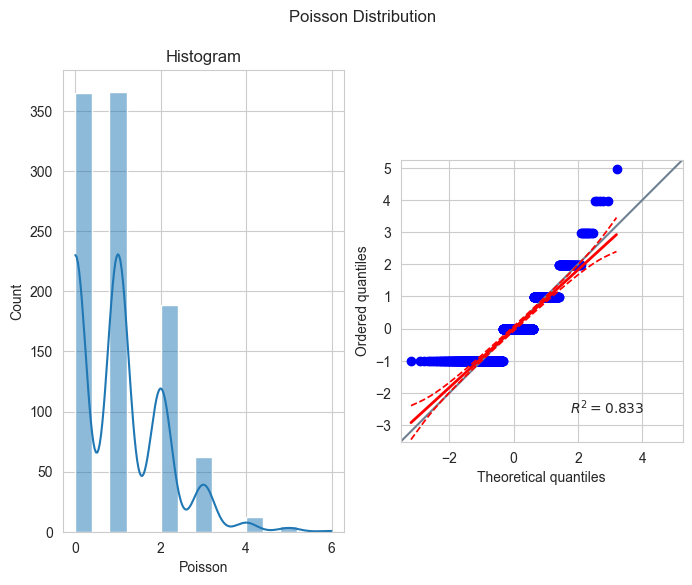

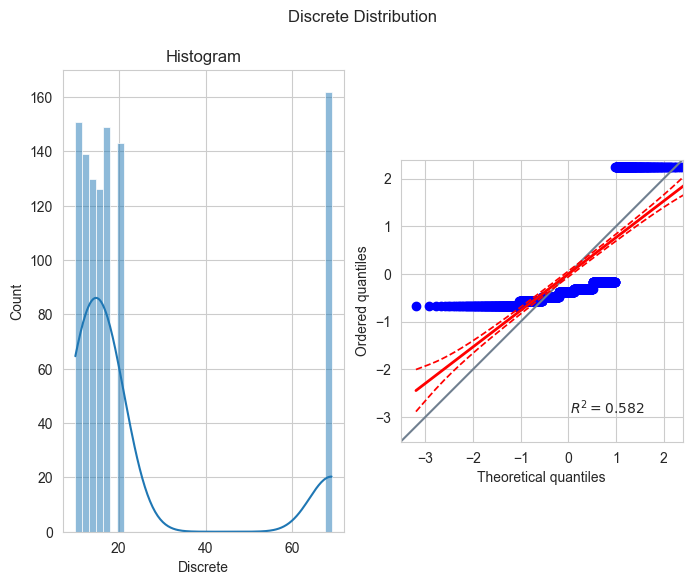

In [16]:
for col in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])

    axes[0].set_title("Histogram")
    pg.qqplot(df[col], dist="norm", ax=axes[1])

    fig.suptitle(f"{col} Distribution")
    plt.show()
    print("\n\n")

In [17]:
df.max() - df.min()

Normal              14.015
Positive skewed      3.583
Negative skewed      3.170
Exponential        220.089
Uniform              0.998
Bimodal             41.681
Multimodal          89.002
Poisson              6.000
Discrete            59.000
dtype: float64

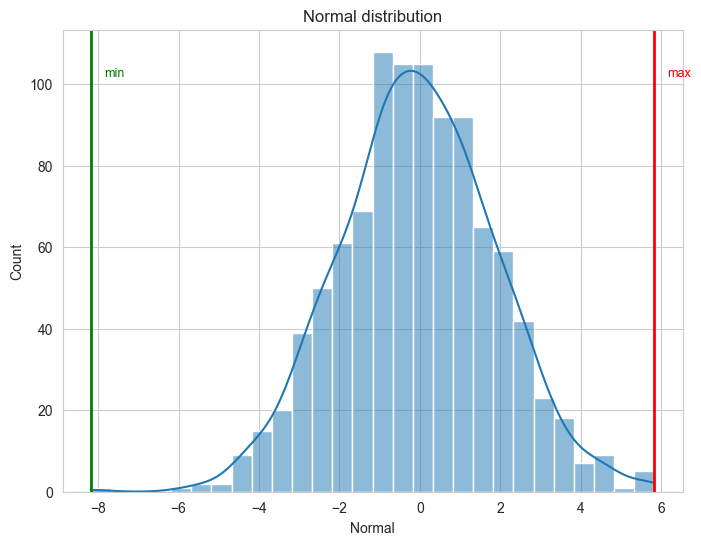

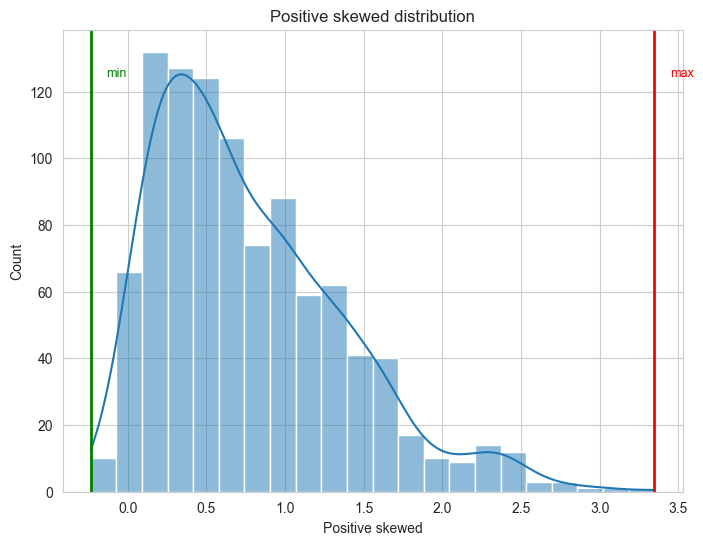

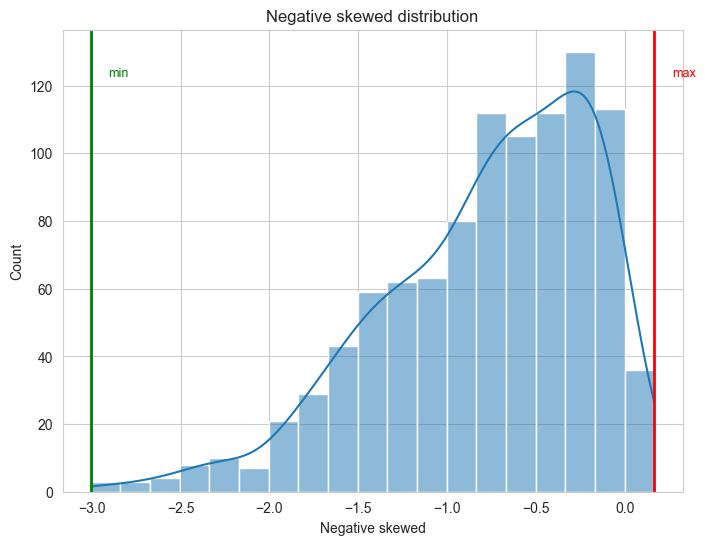

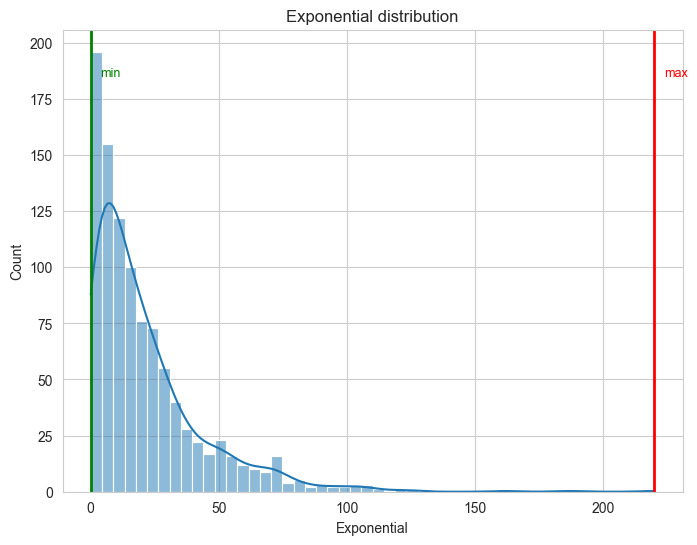

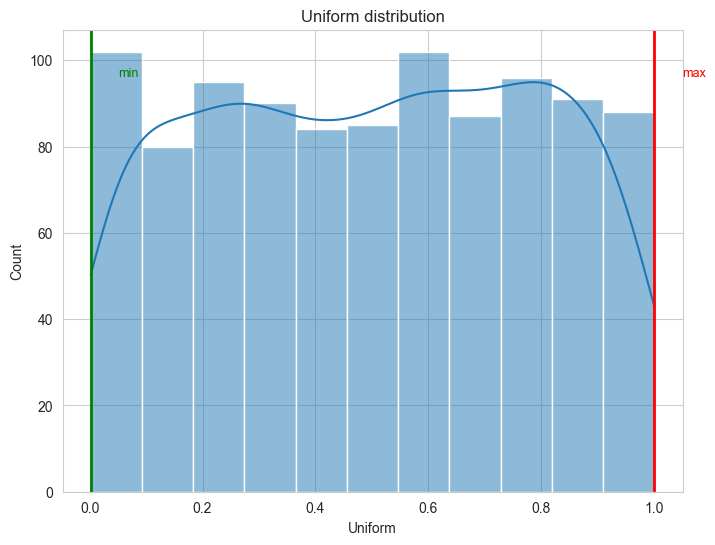

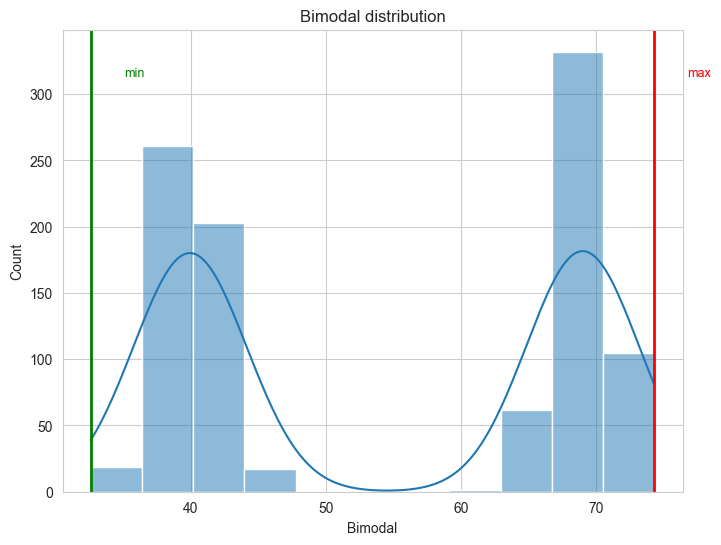

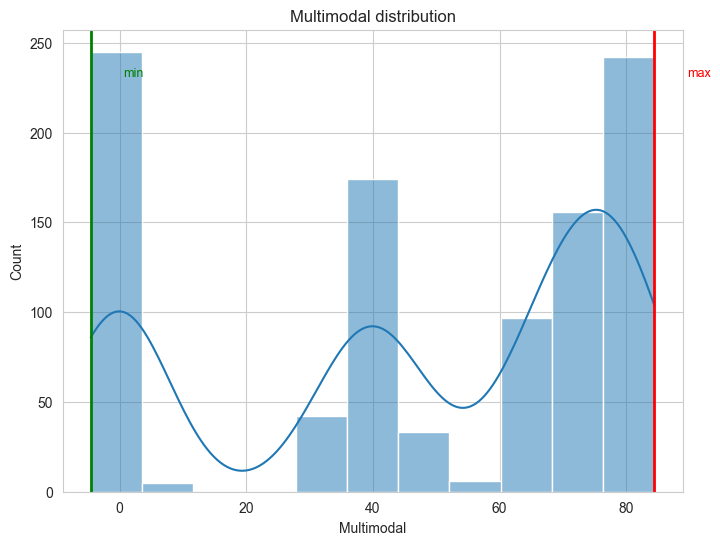

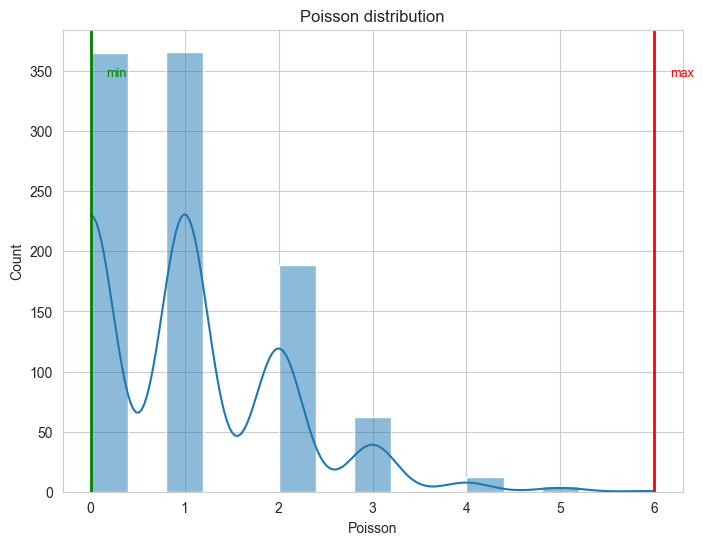

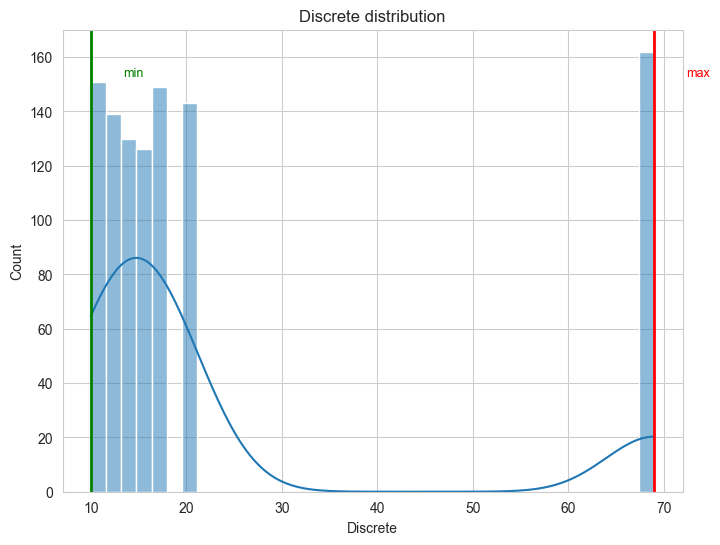

In [23]:
for col in df.columns:
    fig, axes = plt.subplots(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} distribution")

    plt.axvline(df[col].max(), linestyle="-", linewidth=2, c="r")
    plt.text(df[col].max() + df[col].std()/6, 
             y=axes.get_ylim()[1] * 0.90, fontsize=9, s="max", 
             c="r")
    
    plt.axvline(df[col].min(), linestyle="-", linewidth=2, c="g")
    plt.text(df[col].min() + df[col].std()/6, 
             y=axes.get_ylim()[1] * 0.90, fontsize=9, s="min", 
             c="g")

    plt.show()